### Student Information
Name: 柯詠詠

Student ID: 112065502

GitHub ID:86145342

Kaggle name: ke yoyo

Kaggle private scoreboard snapshot: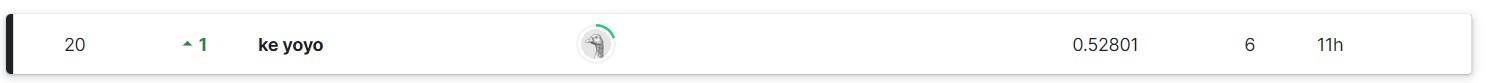

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

# Lab2 take home

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


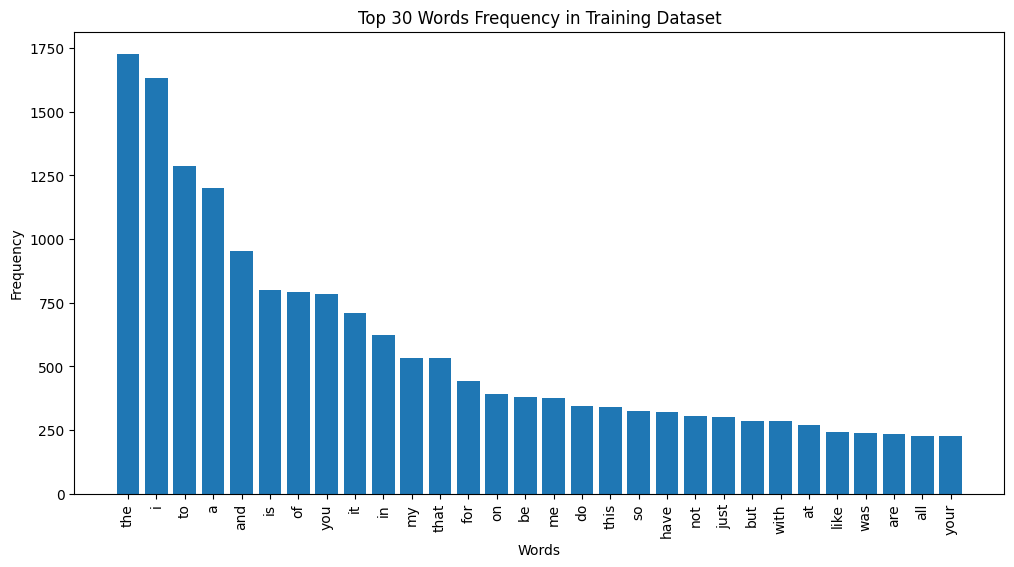

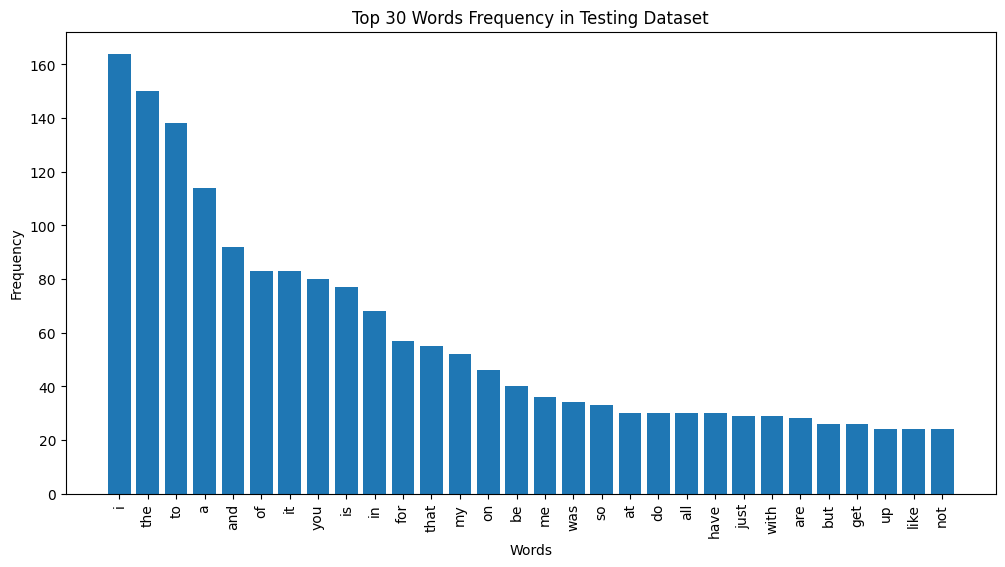

In [ ]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Preprocess the text data
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    return [word for word in words if word.isalnum()]  # Remove non-alphanumeric characters

# Process the training and testing datasets
train_texts = train_df['text'].apply(preprocess_text)
test_texts = test_df['text'].apply(preprocess_text)

# Calculate word frequency for the training dataset
train_word_freq = Counter(word for text in train_texts for word in text)
top_30_train_words, top_30_train_word_freq = zip(*train_word_freq.most_common(30))

# Calculate word frequency for the testing dataset
test_word_freq = Counter(word for text in test_texts for word in text)
top_30_test_words, top_30_test_word_freq = zip(*test_word_freq.most_common(30))

# Plot word frequency for the training dataset
plt.figure(figsize=(12, 6))
plt.bar(top_30_train_words, top_30_train_word_freq)
plt.title("Top 30 Words Frequency in Training Dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

# Plot word frequency for the testing dataset
plt.figure(figsize=(12, 6))
plt.bar(top_30_test_words, top_30_test_word_freq)
plt.title("Top 30 Words Frequency in Testing Dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [ ]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer with 1000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the training data
train_data_tfidf_features = tfidf_vectorizer.fit_transform(train_df['text'])

# Get the feature names
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Display feature names for features 100 to 110
print(feature_names_tfidf[100:110])


['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'anger', 'anger', 'joy', 'fear', 'joy', 'anger',
       'sadness', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

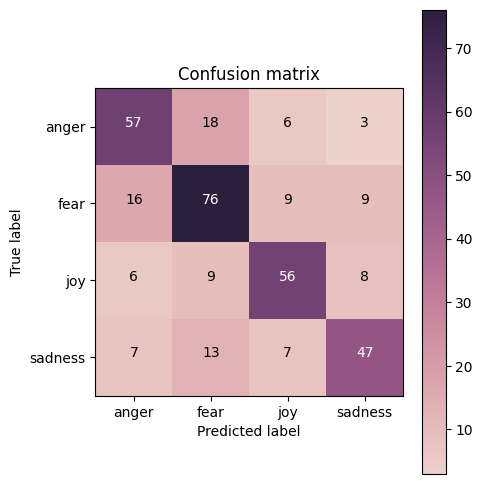

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here


*  The diagonal shows the number of correct classifications for each class. We can see the model performs best on the 'sadness' class with 47 correct predictions.
*   There is some confusion between 'anger' and 'joy', with 6 cases of 'joy' misclassified as 'anger' and 6 cases of 'anger' misclassified as 'joy'. This suggests the model struggles to distinguish these two emotions.


*   There are  27 cases where 'sadness' was misclassified, showing the model isn't really quite good at identifying this emotion correctly.
*   The 'fear' class has a decent number of correct predictions (76) but also some confusion with other classes like 'anger' and 'sadness'.

Overall the model seems decent but could be improved in distinguishing between 'anger','fear' and 'sadness'，these negative emotions.




---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Testing accuracy of Naive Bayes model: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



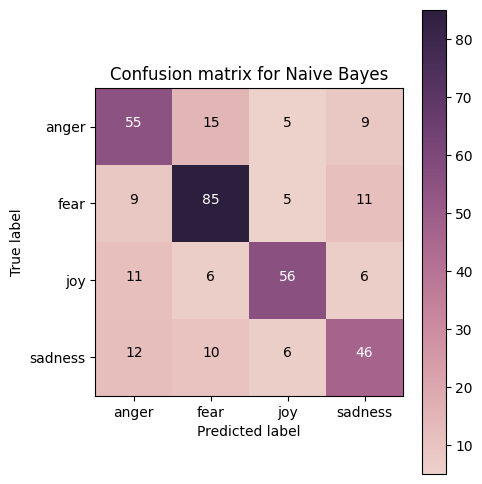

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
NB_model = MultinomialNB()

# Train the Naive Bayes model on the training data
NB_model.fit(X_train, y_train)

# Predict emotions on the testing data
y_test_pred_NB = NB_model.predict(X_test)

# Calculate accuracy on the testing data
accuracy_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('Testing accuracy of Naive Bayes model: {}'.format(round(accuracy_NB, 2)))

# Calculate and print the classification report for precision, recall, and F1-score
classification_report_NB = classification_report(y_true=y_test, y_pred=y_test_pred_NB, target_names=my_tags)
print(classification_report_NB)

# Generate the confusion matrix
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB)

# Visualize the confusion matrix
plot_confusion_matrix(cm_NB, classes=my_tags, title='Confusion matrix for Naive Bayes')


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

## Answer here


*  Precision and Recall Differences:

>  1.   The Naive Bayes model generally shows higher precision for all classes compared to the Decision Tree model.
 2.   The Decision Tree model tends to have slightly higher recall for Anger and Fear, while the Naive Bayes model has higher recall for Joy and Sadness.





*  F1-Score and Accuracy:

>  1.  The F1-Scores are quite comparable between the two models, with the Decision Tree model showing a slight advantage in precision for Anger and Fear.
 2.   
The overall accuracy is slightly better for the Decision Tree model (0.70) compared to the Naive Bayes model (0.68).



### Possible Explanations:


*   Model Complexity:


> Decision Trees are capable of capturing more complex relationships in the data compared to Naive Bayes, which assumes independence between features. This might explain the Decision Tree's ability to achieve a slightly higher accuracy.


*   Data Distribution:

> The performance of the models could be influenced by the distribution of the data. If the data has complex decision boundaries, Decision Trees may outperform Naive Bayes.













### 6.1 Prepare data (X, y)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 428     anger
2492      joy
1947     fear
2755      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/content/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 4ms/step - loss: 1.3181 - accuracy: 0.3737 - val_loss: 1.2720 - val_accuracy: 0.4236
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9661 - accuracy: 0.6526 - val_loss: 0.9154 - val_accuracy: 0.6427
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7966 - val_loss: 0.7759 - val_accuracy: 0.6772
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8464 - val_loss: 0.7762 - val_accuracy: 0.7089
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8785 - val_loss: 0.7948 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2784 - accuracy: 0.9006 - val_loss: 0.8256 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9217 - val_loss: 0.9163 - val_accuracy: 0.6916
Epoch 

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 4ms/step


array([[6.0706145e-01, 3.0183315e-01, 1.6492538e-03, 8.9456208e-02],
       [5.8981444e-04, 9.9920517e-01, 1.8406961e-04, 2.1004445e-05],
       [6.3232496e-02, 4.2705306e-05, 7.7549099e-05, 9.3664730e-01],
       [9.9973369e-01, 9.6234703e-07, 4.4118938e-06, 2.6103063e-04],
       [3.6775658e-03, 9.5140457e-01, 2.0634336e-07, 4.4917699e-02]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'sadness', 'anger', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.373651,1.318110,0.423631,1.272023
1,1,0.652643,0.966096,0.642651,0.915390
2,2,0.796568,0.577874,0.677233,0.775943
3,3,0.846388,0.418507,0.708934,0.776220
4,4,0.878494,0.335610,0.691643,0.794763
5,5,0.900637,0.278372,0.691643,0.825595
6,6,0.921672,0.231150,0.691643,0.916337
7,7,0.931913,0.196560,0.680115,0.926166
8,8,0.945751,0.167663,0.700288,0.991646
9,9,0.957099,0.144558,0.700288,1.022323


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

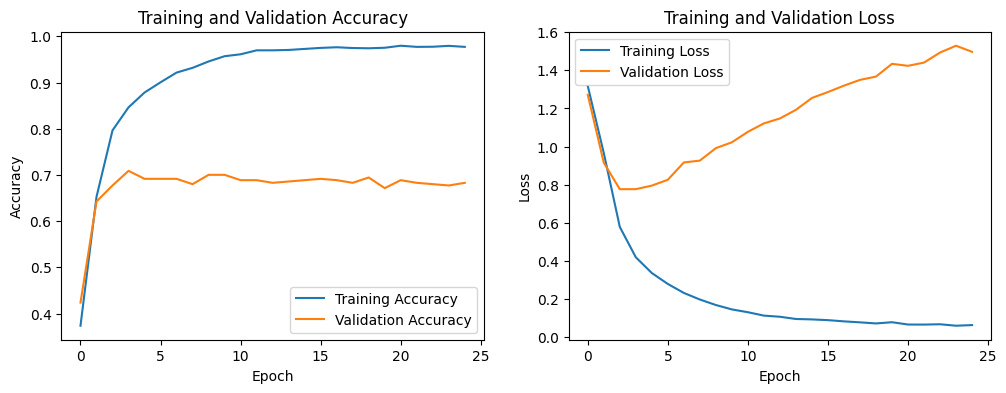

In [ ]:
# Answer here
import matplotlib.pyplot as plt

# Load the training log data
training_log = pd.read_csv("/content/training_log.csv")

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(training_log['loss'], label='Training Loss')
plt.plot(training_log['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
428,10428,"@voguemagazine, did you not learn from @FreePe...","[@, voguemagazine, ,, did, you, not, learn, fr..."
2492,30488,A good thing about being sick is that coughing...,"[A, good, thing, about, being, sick, is, that,..."
1947,21090,@DemPhillyEagles @StonedPhillyFan @CraigfromCi...,"[@, DemPhillyEagles, @, StonedPhillyFan, @, Cr..."
2755,30751,"Hey @AppleSupport, would be nice to have “clic...","[Hey, @, AppleSupport, ,, would, be, nice, to,..."
161,10161,@Slippus @PureGym yeah I received a fine toda...,"[@, Slippus, @, PureGym, yeah, I, received, a,..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'voguemagazine', ',', 'did', 'you', 'not', 'learn', 'from', '@', 'FreePeople', "'s", 'viral', 'insult', 'to', 'ballet', '?', 'Stop', 'trying', 'to', 'wrongfully', 'stick', 'models', 'into', 'pointe', 'shoes', '🙄']),
       list(['A', 'good', 'thing', 'about', 'being', 'sick', 'is', 'that', 'coughing', 'is', 'like', 'an', 'ab', 'workout', '.', 'Maybe', 'my', 'abs', 'will', 'be', 'more', 'defined', 'by', 'the', 'time', 'I', "'m", 'better', '😂😅', '#', 'optimism']),
       list(['@', 'DemPhillyEagles', '@', 'StonedPhillyFan', '@', 'CraigfromCincy', 'do', "n't", 'ever', 'compare', 'those', 'scrubs', 'to', 'ben', '..', 'he', "'ll", 'shake', 'off', 'your', 'whole', 'DL', 'and', 'throw', 'a', 'td', '#', '7'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/content/drive/MyDrive/DM2023-Lab2-Master/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
print(len(training_corpus))

3613


In [ ]:
# Answer here
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Assuming 'training_corpus' is a list of tokenized sentences
#TaggedDocument is a class in gensim used to represent documents and their tags. In this code, tagged_data is a list where each element is a TaggedDocument object
tagged_data = [TaggedDocument(words=word_list, tags=[str(i)]) for i, word_list in enumerate(training_corpus)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=vector_dim, window=window_size, min_count=min_count, epochs=training_epochs)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Infer vectors for sentences
sentence_vectors = [doc2vec_model.infer_vector(words) for words in training_corpus]

for i, vector in enumerate(sentence_vectors):
    print(f"Sentence {i + 1} Vector: {vector}")


#這裡沒有更改上面的vector_dim，所以用100下去跑，才會這麼多數字

串流輸出內容已截斷至最後 5000 行。
  4.58553322e-02  8.38334262e-02  5.06926253e-02  2.27011722e-02
  3.69124971e-02  1.66702569e-02 -7.00526237e-02 -3.16425948e-03
  1.00133114e-01  7.08462968e-02  1.02305777e-01  6.70180693e-02
  5.53414375e-02  1.88606307e-02 -7.82359019e-02 -2.89674774e-02
 -1.46427661e-01  1.08774349e-01  2.44773272e-02 -5.19659296e-02
 -7.28060380e-02  3.81369004e-03  4.90636490e-02  1.17694572e-01
  6.09657168e-02  4.62676436e-02  6.32523149e-02 -2.84754988e-02
  3.00792977e-02  5.79573028e-02  1.72535151e-01  8.43539983e-02
  2.12108880e-01  2.22115051e-02 -2.96044163e-02  1.01907263e-02]
Sentence 1757 Vector: [-0.14350231  0.07143182 -0.03662598 -0.0171194   0.12712386 -0.02332351
 -0.02040509  0.15980476 -0.10267717 -0.0323674   0.04176856 -0.05837058
  0.07400527  0.08510988 -0.02699247  0.03514128  0.0872158  -0.09576506
 -0.04473351 -0.20310007  0.05165282  0.02092093  0.0410658  -0.12070269
 -0.07505758  0.00526143 -0.02762556 -0.05786566 -0.08130069 -0.04704396
  0.12

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



串流輸出內容已截斷至最後 5000 行。
 -4.17083539e-02  1.53943509e-01  8.89433250e-02 -1.33386314e-01
 -6.36351407e-02  1.46447765e-02  4.79892828e-02  5.67670949e-02
 -4.98748478e-03 -7.27249160e-02 -2.29863524e-01  5.88034466e-02
  4.49255854e-02 -3.42887118e-02 -9.84198079e-02  6.10020012e-02
  5.48257530e-02  1.05770141e-01  1.21451221e-01  1.95397764e-01
 -1.88531384e-01  1.75090775e-01 -7.88429976e-02  7.42539018e-02
  8.24299604e-02  6.84313942e-03  1.27213433e-01  7.21968058e-03
 -8.14292207e-03 -4.23938781e-03 -1.37045532e-01 -3.55155617e-02
 -2.40465879e-01 -8.48432109e-02 -1.27067223e-01  2.36701742e-01
 -6.80217221e-02 -7.58482516e-03  8.53476673e-02  1.69889227e-01
  1.81232113e-02  4.49917279e-02  1.66385636e-01  9.56756324e-02
 -3.49388346e-02  1.47021979e-01  2.07098737e-01  2.53021941e-02
 -3.21571864e-02 -1.80612206e-02  7.70143867e-02  4.32213619e-02]
Sentence 3347 Vector: [ 0.0148679  -0.02350186 -0.01234815 -0.01602629  0.01929887 -0.03519288
 -0.00670559  0.0142065  -0.01923417 -

### 9.2 Plot using t-SNE (2-dimension)

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

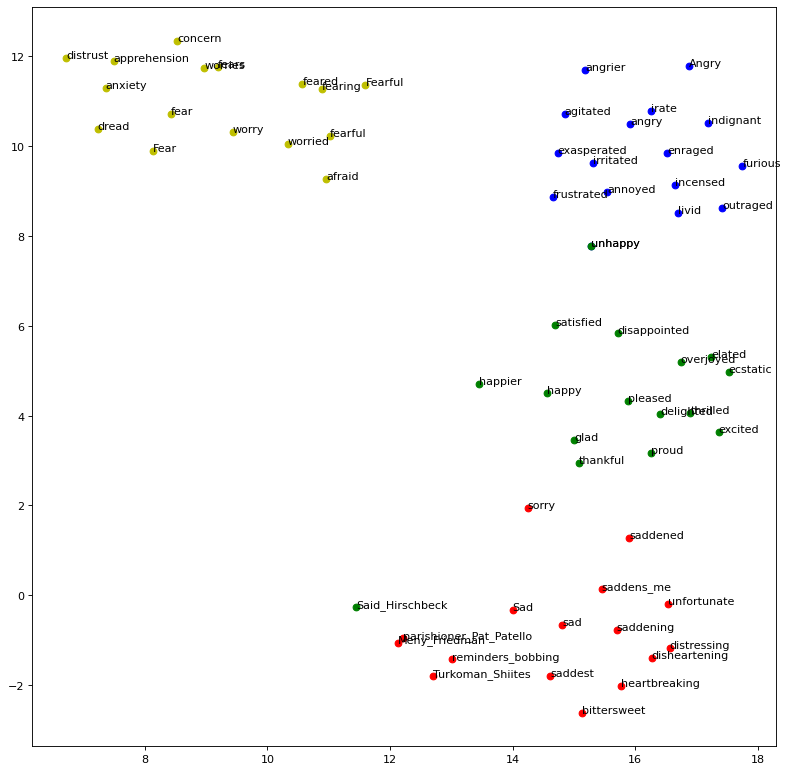

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming w2v_google_model is your Word2Vec model

# Target words and their related words
target_words = ["angry", "happy", "sad", "fear"]
topn = 15
related_words = []

for word in target_words:
    similar_words = [word] + [word_ for word_, sim_ in w2v_google_model.most_similar(word, topn=topn)]
    related_words.extend(similar_words)

# Prepare training word vectors
size = 200
all_word = list(w2v_google_model.index_to_key)
word_train = related_words + all_word[:size]
X_train = w2v_google_model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Training
X_tsne = tsne.fit_transform(X_train)

# Assign colors to each group
colors = ['b'] * (topn + 1) + ['g'] * (topn + 1) + ['r'] * (topn + 1) + ['y'] * (topn + 1)

# Plotting the result with assigned colors
plt.figure(figsize=(12, 12), dpi=80)
for i in range(len(related_words)):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=colors[i])

for label, x, y in zip(related_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.show()







# kaggle competition

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df_data_identification = pd.read_csv("/kaggle/input/dm-hw2/dm2023-isa5810-lab2-homework-20231125T125156Z-001/dm2023-isa5810-lab2-homework/data_identification.csv")
df_data_identification

In [ ]:
grouped_df = df_data_identification.groupby('identification')

test_id = grouped_df.get_group('test')
train_id = grouped_df.get_group('train')


test_id.to_csv('test_id.csv', index=False)
train_id.to_csv('train_id.csv', index=False)

In [ ]:
train_id

In [ ]:
df_emotion = pd.read_csv("/kaggle/input/dm-hw2/dm2023-isa5810-lab2-homework-20231125T125156Z-001/dm2023-isa5810-lab2-homework/emotion.csv")
df_emotion

In [ ]:
json_file_path = '/kaggle/input/dm-hw2/dm2023-isa5810-lab2-homework-20231125T125156Z-001/dm2023-isa5810-lab2-homework/tweets_DM.json'

records = []
with open(json_file_path, 'r') as file:
    for line in file:
        data_object = json.loads(line)

        #  extract "tweet_id" and "text"
        tweet_id = data_object['_source']['tweet']['tweet_id']
        text = data_object['_source']['tweet']['text']

        records.append({'tweet_id': tweet_id, 'text': text})




df_record_data = pd.DataFrame(records)
df_record_data



In [ ]:
df_record_data.to_csv('/kaggle/working/record_data.csv', index=False)

In [ ]:
# 根據 df_train 中的 tweet_id 選擇相對應的 record_data 行
train_records = df_record_data[df_record_data['tweet_id'].isin(train_id['tweet_id'])]
train_records.to_csv('/kaggle/working/train_records.csv', index=False)
train_records



In [ ]:
merged_final_train = pd.merge(train_records, df_emotion, on='tweet_id', how='left')
merged_final_train.to_csv('merged_final_train.csv', index=False)
merged_final_train

In [ ]:
print(merged_final_train['emotion'].value_counts())

In [ ]:
emotion_mapping = {
    'anticipation': 0,
    'sadness': 1,
    'fear': 2,
    'joy': 3,
    'disgust': 4,
    'trust': 5,
    'surprise': 6,
    'anger': 7,


    # Add more emotions as needed
}

# Replace the emotion column with numeric labels
merged_final_train['emotion'] = merged_final_train['emotion'].map(emotion_mapping)
merged_final_train

### 去除特殊符號 及 emoji

In [ ]:
import re
merged_final_train['text'] = merged_final_train['text'].apply(lambda x: re.sub(r'@\S+|https?:\S+|http?:\S', '', x))
merged_final_train['text'] = merged_final_train['text'].apply(lambda x: re.sub(r'<LH>', '', x))
merged_final_train['text'] = merged_final_train['text'].apply(lambda x: re.sub(r'#\S+', '', x))

merged_final_train

In [ ]:
pip install emoji

In [ ]:
import emoji
def remove_emojis(text):
    text_no_emojis = emoji.demojize(text).replace(":", "").replace("_", " ")
    return text_no_emojis

merged_final_train['text'] = merged_final_train['text'].apply(remove_emojis)
merged_final_train

### training preparation

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    n_gpu = torch.cuda.device_count()

    print('There are %d GPU(s) available.' % n_gpu)

    print('We will use the GPU:', [torch.cuda.get_device_name(i) for i in range(n_gpu)])

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

In [ ]:
pip install transformers

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.sampler import RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



train_inputs, test_inputs, train_labels, test_labels = train_test_split(merged_final_train.index.values,
                                                  merged_final_train.emotion.values,
                                                  test_size=0.15,
                                                  random_state=15,
                                                  stratify=merged_final_train.emotion.values)

merged_final_train.loc[train_inputs, 'data_type'] = 'train'
merged_final_train.loc[test_inputs, 'data_type'] = 'val'



In [ ]:
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)

# Tokenize and encode the training data
encoded_data_train = tokenizer.batch_encode_plus(
    merged_final_train[merged_final_train.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

# Tokenize and encode the validation data
encoded_data_val = tokenizer.batch_encode_plus(
    merged_final_train[merged_final_train.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)



In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(merged_final_train[merged_final_train.data_type=='train'].emotion.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(merged_final_train[merged_final_train.data_type=='val'].emotion.values)

### 下載預訓練的BERT模型

In [ ]:

#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=8)

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=8)



In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
batch_size = 16

# Extract encoded input IDs, attention masks, and labels for the training set
dataloader_train = DataLoader(dataset_train,
                sampler=RandomSampler(dataset_train),
                batch_size=batch_size)

# Extract encoded input IDs, attention masks, and labels for the validation set
dataloader_validation = DataLoader(dataset_val,
                  sampler=SequentialSampler(dataset_val),
                  batch_size=batch_size)

### 定義損失函數和optimizer

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
epochs = 1

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader_train)*epochs)

### 定義f1/acc/evaluate  function

In [ ]:
def f1_score_func(preds, labels):
   # Flatten the predicted and true labels and calculate weighted F1 score
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
  # Create an inverse dictionary to map numerical labels to their original classes
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    # Flatten the predicted and true labels
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    # Iterate over unique labels to calculate accuracy per class
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

# Set the seed for the random module
random.seed(777)

# Set the seed for NumPy
np.random.seed(777)

# Set the seed for the PyTorch random number generators
torch.manual_seed(777)
torch.cuda.manual_seed_all(777)


In [ ]:
def evaluate(dataloader_val):

    # Set the model to evaluation mode
    model.eval()

    # Initialize variables to store total loss, predictions, and true labels
    loss_val_total = 0
    predictions, true_vals = [], []

    # Iterate over batches in the validation dataloader
    for batch in dataloader_val:

        # Move batch elements to the appropriate device (CPU or GPU)
        batch = tuple(b.to(device) for b in batch)

        # Define input dictionary for the model
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        # Disable gradient computation during inference
        with torch.no_grad():
            outputs = model(**inputs)

        # Extract loss and logits from the model outputs
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        # Detach logits to numpy arrays and store predictions and true labels
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    # Calculate average validation loss
    loss_val_avg = loss_val_total / len(dataloader_val)

    # Concatenate predictions and true labels into numpy arrays
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

### 開始訓練

In [ ]:
from tqdm import tqdm
from sklearn.metrics import f1_score


# Move the model to the GPU
model.to(device)

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'finetuned_roberta_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

## submission

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df_data_identification = pd.read_csv("/kaggle/input/dm-hw2/dm2023-isa5810-lab2-homework-20231125T125156Z-001/dm2023-isa5810-lab2-homework/data_identification.csv")
df_data_identification

In [ ]:
grouped_df = df_data_identification.groupby('identification')

test_id = grouped_df.get_group('test')
train_id = grouped_df.get_group('train')


test_id.to_csv('test_id.csv', index=False)
train_id.to_csv('train_id.csv', index=False)

In [ ]:
json_file_path = '/kaggle/input/dm-hw2/dm2023-isa5810-lab2-homework-20231125T125156Z-001/dm2023-isa5810-lab2-homework/tweets_DM.json'

records = []
with open(json_file_path, 'r') as file:
    for line in file:
        data_object = json.loads(line)

        #  extract "tweet_id" and "text"
        tweet_id = data_object['_source']['tweet']['tweet_id']
        text = data_object['_source']['tweet']['text']

        records.append({'tweet_id': tweet_id, 'text': text})




df_record_data = pd.DataFrame(records)
df_record_data


In [ ]:
df_record_data.to_csv('/kaggle/working/record_data.csv', index=False)

In [ ]:
test_records = df_record_data[df_record_data['tweet_id'].isin(test_id['tweet_id'])]
test_records.to_csv('/kaggle/working/test_records.csv', index=False)
test_records


In [ ]:
pip install emoji

In [ ]:
import re
test_records['text'] = test_records['text'].apply(lambda x: re.sub(r'@\S+|https?:\S+|http?:\S', '', x))

# 處理特殊符號
test_records['text'] = test_records['text'].apply(lambda x: re.sub(r'<LH>', '', x))
test_records['text'] = test_records['text'].apply(lambda x: re.sub(r'#\S+', '', x))


test_records

In [ ]:
import emoji
#去掉emoji
def remove_emojis(text):
    text_no_emojis = emoji.demojize(text).replace(":", "").replace("_", " ")
    return text_no_emojis

test_records['text'] = test_records['text'].apply(remove_emojis)
test_records

In [ ]:
pip install transformers


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Load my trained model
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=8)
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=8)

model.load_state_dict(torch.load('/kaggle/input/roberta-without-emoji/model20231225_transformer_roberta.pth'))
model.eval()

# Load tokenizer
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = model.to(device)



In [ ]:
test = test_records.set_index('tweet_id').T.to_dict('list')

test




In [ ]:
label = []
from tqdm import tqdm

label = []

# Use tqdm to create a progress bar
for id in tqdm(test, desc="Processing"):
    sentence = test[id]

    inputs = tokenizer(sentence, padding='max_length', truncation=True, max_length=256, return_tensors="pt")

    # Move input tensors to the same device as the model
    ids = inputs["input_ids"].to(device)
    mask = inputs["attention_mask"].to(device)

    # Move to model
    outputs = model(ids, mask)
    logits = outputs.logits  # Assuming the model returns logits directly

    active_logits = logits.view(-1, model.config.num_labels)

for id in test:
    sentence = test[id]

    inputs = tokenizer(sentence, padding='max_length', truncation=True, max_length=256, return_tensors="pt")

  # to gpu
    ids = inputs["input_ids"].to(device)
    mask = inputs["attention_mask"].to(device)

  # to model
    outputs = model(ids, mask)
    logits = outputs[0]

    active_logits = logits.view(-1, model.num_labels) # 大小 (batch_size * seq_len, num_labels)
    flattened_predictions = torch.argmax(active_logits, axis=1) # 大小 (batch_size*seq_len,)

    tokens = tokenizer.convert_ids_to_tokens(ids.squeeze().tolist())
    ids_to_labels = {'0':'anticipation', '1':'sadness', '2':'fear', '3':'joy', '4':'disgust', '5':'trust', '6':'surprise', '7':'anger'}
    token_predictions = ids_to_labels[str(flattened_predictions.cpu().numpy()[0])]
    label.append(token_predictions)




In [ ]:
#轉成繳交csv的欄位
fin_df = test_records

fin_df = fin_df.assign(emotion = label)

fin_df = fin_df.drop(['text'], axis=1)

fin_df

fin_df.rename(columns={'tweet_id': 'id'}, inplace=True)

fin_df.to_csv('/kaggle/working/submission.csv', index=False)

最一開始我用bert，但是模型訓練寫法好像不太對，所以一開是public score只有0.38左右，後來我訓練部分直接全部重寫。

資料處理的部分，我有分別嘗試過:



1.   把emoji去掉
2.   emoji留著
3.   把emoji轉成文字

但是最後是"把emoji去掉"得到的效果最好



模型的部分，我有嘗試過:


1.   bert
2.   roberta

bert的效果也不差，public score 大約52-53，roberta 的效果略好，大約54

